# Task 1: Prediction using Supervised ML

### Author: Atharva Hankare

## Problem Statement:
To predict the percentage of a student based on the number of hours the student has studied using 'Simple Linear Regression'.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

### Exploring Dataset

In [2]:
url = "http://bit.ly/w-data"
stud_data = pd.read_csv(url)
print("Data imported successfully")

stud_data.head(11)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Data Visualization

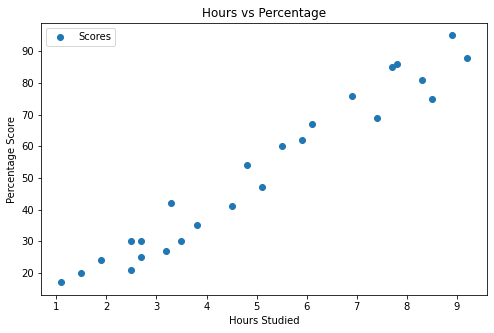

In [3]:
stud_data.plot(x='Hours', y='Scores', style='o', figsize=(8,5))  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

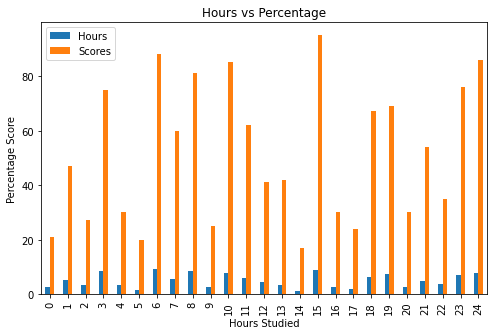

In [4]:
stud_data.plot(kind='bar',figsize=(8,5))
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### Preparing Data for Modelling

In [5]:
X = stud_data.iloc[:, :-1].values  
y = stud_data.iloc[:, 1].values

In [6]:
# Splitting the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

### Training the Algorithm

In [7]:
#Building and training the linear model
 
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [8]:
# Plotting the regression line

line = regressor.coef_*X+regressor.intercept_

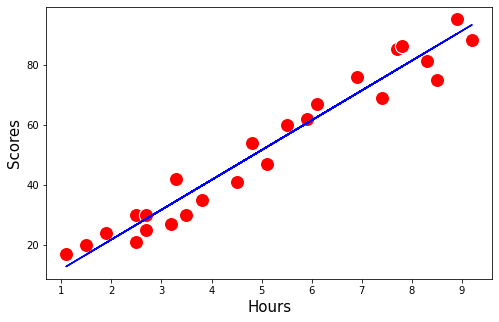

In [9]:
# Plotting for the test data

plt.figure(figsize=(8,5))
sns.scatterplot(x = stud_data['Hours'],y = stud_data['Scores'],s=200,color='r')
plt.plot(stud_data['Hours'],line,'b')
plt.xlabel(xlabel='Hours',fontsize = 15)
plt.ylabel(ylabel='Scores',fontsize = 15)
plt.show()

### Making Predictions

In [10]:
print(X_test)                         # Testing data - In Hours
y_pred = regressor.predict(X_test)    # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [11]:
# Comparing Actual vs Predicted

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


##### Predicting the score of a student if he/she studies 9.25 hrs/day

In [12]:
hours = 9.25
own_pred = regressor.predict(np.array(hours).reshape(-1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


### Evaluating the performance of the model

In [13]:
# Evaluationg the performance of the algorithm
  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


## Conclusion:
Here, as calculated the Mean Absolute Error and Root Mean Squared Error are less than 5%. Hence, it is safe to conclude that the model did a decent job to predict the student's score as 93.69% when studied for 9.5 hours.